In [1]:
# Installing necessary libraries.
!pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importing common libraries:
# pandas (data handling), numpy (numerical operations), 
# matplotlib (plotting), and seaborn (data visualization).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the US Census Income dataset into a DataFrame.
# Using .shape to check the number of rows and columns in the dataset.

dataset_1 = pd.read_csv("US_Census_Income.csv") 
dataset_1.shape

(32561, 15)

In [4]:
# Displaying the first 5 rows of the dataset to understand its structure and content.

print("First 5 rows of the Dataset:")
print(dataset_1.head())

First 5 rows of the Dataset:
   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356  

In [5]:
# Displaying dataset information, including column types, non-null counts, and memory usage.

print("Dataset Info:")
dataset_1.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Checking for missing values in each column of the dataset.
# .isnull() identifies null values, and .sum() gives the total count per column.

print("Missing Values in the Dataset:")
print(dataset_1.isnull().sum())

Missing Values in the Dataset:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [7]:
# Converting all columns in the dataset to 'category' type for optimized memory usage.
# Displaying the first 5 rows to verify changes after feature engineering.

dataset_1 = dataset_1.astype('category')
print("First 5 rows of Dataset after feature engineering:")
print(dataset_1.head())

First 5 rows of Dataset after feature engineering:
  age workclass  fnlwgt     education education.num marital.status  \
0  90         ?   77053       HS-grad             9        Widowed   
1  82   Private  132870       HS-grad             9        Widowed   
2  66         ?  186061  Some-college            10        Widowed   
3  54   Private  140359       7th-8th             4       Divorced   
4  41   Private  264663  Some-college            10      Separated   

          occupation   relationship   race     sex capital.gain capital.loss  \
0                  ?  Not-in-family  White  Female            0         4356   
1    Exec-managerial  Not-in-family  White  Female            0         4356   
2                  ?      Unmarried  Black  Female            0         4356   
3  Machine-op-inspct      Unmarried  White  Female            0         3900   
4     Prof-specialty      Own-child  White  Female            0         3900   

  hours.per.week native.country income  
0     

In [8]:
# Applying Label Encoding to categorical columns to convert them into numerical format.

from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

dataset_1['workclass']= le.fit_transform(dataset_1['workclass'])
dataset_1['education']= le.fit_transform(dataset_1['education'])
dataset_1['marital.status']= le.fit_transform(dataset_1['marital.status'])
dataset_1['occupation']= le.fit_transform(dataset_1['occupation'])
dataset_1['relationship']= le.fit_transform(dataset_1['relationship'])
dataset_1['race']= le.fit_transform(dataset_1['race'])
dataset_1['sex']= le.fit_transform(dataset_1['sex'])
dataset_1['native.country']= le.fit_transform(dataset_1['native.country'])
dataset_1['income']= le.fit_transform(dataset_1['income'])

c:\users\sai sharan\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


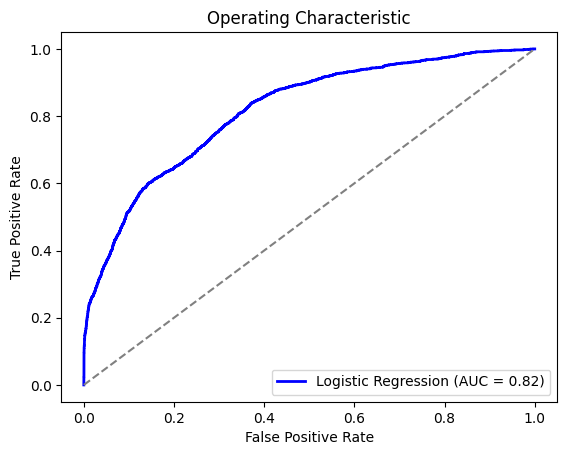

Logistic Regression - Accuracy: 0.8099
Logistic Regression - F1 Score: 0.4872
Logistic Regression - Cohen's Kappa: 0.3825
RMSE : 0.43599438587472644
F-Measure : 0.4872
Sensitivity : 0.3769
Specificity : 0.6885


In [9]:
# Importing necessary libraries for Logistic Regression, model evaluation, and metrics.
# Splitting data into training and testing sets.
# Training the Logistic Regression model and making predictions.
# Evaluating the model using various metrics: Accuracy, F1 score, Cohen's Kappa, ROC curve, RMSE, and confusion matrix.
# Plotting the ROC curve to assess model performance.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, roc_curve, auc, confusion_matrix, mean_squared_error, precision_score, recall_score

X_data_1 = dataset_1.drop('income', axis=1)
y_data_1 = dataset_1['income']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_data_1, y_data_1, test_size=0.3, random_state=42)

log_reg_1 = LogisticRegression(max_iter=1000)
log_reg_1.fit(X_train_1, y_train_1)

y_pred_1 = log_reg_1.predict(X_test_1)

accuracy_1 = accuracy_score(y_test_1, y_pred_1)
f1_1 = f1_score(y_test_1, y_pred_1)
cohen_kappa_1 = cohen_kappa_score(y_test_1, y_pred_1)

fpr_1, tpr_1, thresholds_1 = roc_curve(y_test_1, log_reg_1.predict_proba(X_test_1)[:, 1])
roc_auc_1 = auc(fpr_1, tpr_1)

plt.figure()
plt.plot(fpr_1, tpr_1, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"Logistic Regression - Accuracy: {accuracy_1:.4f}")
print(f"Logistic Regression - F1 Score: {f1_1:.4f}")
print(f"Logistic Regression - Cohen's Kappa: {cohen_kappa_1:.4f}")

rmse_1 = np.sqrt(mean_squared_error(y_test_1, y_pred_1))
print("RMSE :", rmse_1)
rss = ((y_test_1 - y_pred_1) ** 2).sum()

precision_1 = precision_score(y_test_1, y_pred_1)
recall_1 = recall_score(y_test_1, y_pred_1)
f_measure_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1)

sensitivity_1 = recall_1
cm_1 = confusion_matrix(y_test_1, y_pred_1)
specificity_1 = (cm_1[1,1]) / (cm_1[1,1] + cm_1[0,1])

print(f"F-Measure : {f_measure_1:.4f}")
print(f"Sensitivity : {sensitivity_1:.4f}")
print(f"Specificity : {specificity_1:.4f}")

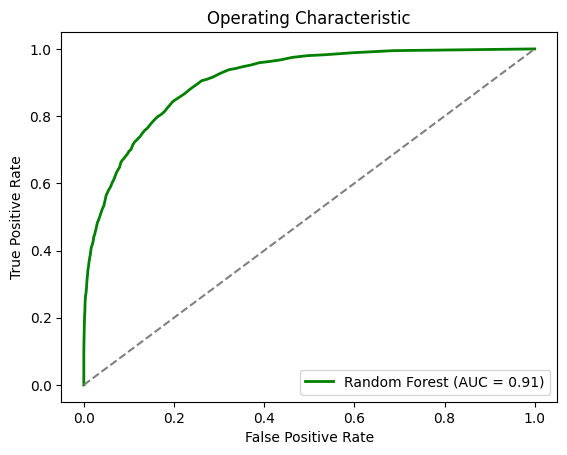

Random Forest - Accuracy: 0.8563
Random Forest - F1 Score: 0.6706
Random Forest - Cohen's Kappa: 0.5798
RMSE : 0.37910411550398193
F-Measure : 0.6706
Sensitivity : 0.6107
Specificity : 0.7435


In [10]:
# Importing Random Forest Classifier for training and evaluation.
# Splitting the data into training and testing sets.
# Training the Random Forest model with 100 estimators and making predictions.
# Evaluating the model using metrics: Accuracy, F1 score, Cohen's Kappa, ROC curve, RMSE, and confusion matrix.
# Plotting the ROC curve for Random Forest model performance.

from sklearn.ensemble import RandomForestClassifier

X_data_1_rf = dataset_1.drop('income', axis=1)
y_data_1_rf = dataset_1['income']
X_train_1_rf, X_test_1_rf, y_train_1_rf, y_test_1_rf = train_test_split(X_data_1_rf, y_data_1_rf, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_1_rf, y_train_1_rf)

y_pred_1_rf = rf.predict(X_test_1_rf)

accuracy_1_rf = accuracy_score(y_test_1_rf, y_pred_1_rf)
f1_1_rf = f1_score(y_test_1_rf, y_pred_1_rf)
cohen_kappa_1_rf = cohen_kappa_score(y_test_1_rf, y_pred_1_rf)

fpr_1_rf, tpr_1_rf, thresholds_1_rf = roc_curve(y_test_1_rf, rf.predict_proba(X_test_1_rf)[:, 1])
roc_auc_1_rf = auc(fpr_1_rf, tpr_1_rf)

plt.figure()
plt.plot(fpr_1_rf, tpr_1_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_1_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"Random Forest - Accuracy: {accuracy_1_rf:.4f}")
print(f"Random Forest - F1 Score: {f1_1_rf:.4f}")
print(f"Random Forest - Cohen's Kappa: {cohen_kappa_1_rf:.4f}")

rmse_1_rf = np.sqrt(mean_squared_error(y_test_1_rf, y_pred_1_rf))
print("RMSE :", rmse_1_rf)

rss = ((y_test_1_rf - y_pred_1_rf) ** 2).sum()

precision_1_rf = precision_score(y_test_1_rf, y_pred_1_rf)
recall_1_rf = recall_score(y_test_1_rf, y_pred_1_rf)
f_measure_1_rf = 2 * (precision_1_rf * recall_1_rf) / (precision_1_rf + recall_1_rf)

sensitivity_1_rf = recall_1_rf
cm_1_rf = confusion_matrix(y_test_1_rf, y_pred_1_rf)
specificity_1_rf = (cm_1_rf[1,1]) / (cm_1_rf[1,1] + cm_1_rf[0,1])

print(f"F-Measure : {f_measure_1_rf:.4f}")
print(f"Sensitivity : {sensitivity_1_rf:.4f}")
print(f"Specificity : {specificity_1_rf:.4f}")

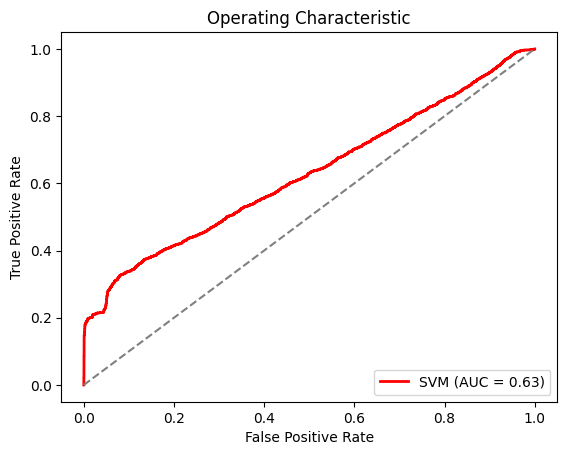

SVM - Accuracy: 0.7943
SVM - F1 Score: 0.2507
SVM - Cohen's Kappa: 0.2020
RMSE : 0.4534870749842903
F-Measure : 0.2507
Sensitivity : 0.1436
Specificity : 0.9853


In [11]:
# Importing Support Vector Machine (SVM) for classification and evaluation.
# Splitting the dataset into training and testing sets.
# Training the SVM model and making predictions.
# Evaluating the model using metrics: Accuracy, F1 score, Cohen's Kappa, ROC curve, RMSE, and confusion matrix.
# Plotting the ROC curve for SVM model performance.

from sklearn.svm import SVC

X_data_1_sv = dataset_1.drop('income', axis=1)
y_data_1_sv = dataset_1['income']
X_train_1_sv, X_test_1_sv, y_train_1_sv, y_test_1_sv = train_test_split(X_data_1_sv, y_data_1_sv, test_size=0.3, random_state=42)

svm = SVC(probability=True, random_state=42)
svm.fit(X_train_1_sv, y_train_1_sv)

y_pred_1_sv = svm.predict(X_test_1_sv)

accuracy_1_sv = accuracy_score(y_test_1_sv, y_pred_1_sv)
f1_1_sv = f1_score(y_test_1_sv, y_pred_1_sv)
cohen_kappa_1_sv = cohen_kappa_score(y_test_1_sv, y_pred_1_sv)

fpr_1_sv, tpr_1_sv, thresholds_1_sv = roc_curve(y_test_1_sv, svm.predict_proba(X_test_1_sv)[:, 1])
roc_auc_1_sv = auc(fpr_1_sv, tpr_1_sv)

plt.figure()
plt.plot(fpr_1_sv, tpr_1_sv, color='red', lw=2, label=f'SVM (AUC = {roc_auc_1_sv:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"SVM - Accuracy: {accuracy_1_sv:.4f}")
print(f"SVM - F1 Score: {f1_1_sv:.4f}")
print(f"SVM - Cohen's Kappa: {cohen_kappa_1_sv:.4f}")

rmse_1_sv = np.sqrt(mean_squared_error(y_test_1_sv, y_pred_1_sv))
print("RMSE :", rmse_1_sv)

rss = ((y_test_1_sv - y_pred_1_sv) ** 2).sum()

precision_1_sv = precision_score(y_test_1_sv, y_pred_1_sv)
recall_1_sv = recall_score(y_test_1_sv, y_pred_1_sv)
f_measure_1_sv = 2 * (precision_1_sv * recall_1_sv) / (precision_1_sv + recall_1_sv)

sensitivity_1_sv = recall_1_sv
cm_1_sv = confusion_matrix(y_test_1_sv, y_pred_1_sv)
specificity_1_sv = (cm_1_sv[1,1]) / (cm_1_sv[1,1] + cm_1_sv[0,1])

print(f"F-Measure : {f_measure_1_sv:.4f}")
print(f"Sensitivity : {sensitivity_1_sv:.4f}")
print(f"Specificity : {specificity_1_sv:.4f}")

In [12]:
# Loading the Ratings dataset into a DataFrame.
# Using .shape to view the number of rows and columns in the dataset.

dataset_2 = pd.read_csv("ratings_dataset.csv") 

dataset_2.shape

(11000, 13)

In [13]:
# Displaying the first 5 rows of the Ratings dataset to examine its structure and content.

print("First 5 rows of the Dataset:")
print(dataset_2.head())

First 5 rows of the Dataset:
   ID          Time_GMT        Phone                             Organization  \
0   1  12-03-2021 02:10  12562343500                       The Station's Best   
1   2  12-03-2021 02:10  12566758004                                Pizza Hut   
2   3  12-03-2021 02:10  12562342181  Zaxby's Chicken Fingers & Buffalo Wings   
3   4  12-03-2021 02:10  12564097272                        Papa John's Pizza   
4   5  12-03-2021 02:10  12562155510                                   Arby's   

   Rating  NumberReview  Category Country CountryCode State            City  \
0     4.0             4  Delivery     USA          US    AL  Alexander City   
1     3.0             6  Delivery     USA          US    AL  Alexander City   
2     3.0            13  Delivery     USA          US    AL  Alexander City   
3     1.0             1  Delivery     USA          US    AL  Alexander City   
4     2.0             7  Delivery     USA          US    AL  Alexander City   

         

In [14]:
# Displaying information about the Ratings dataset, including column types, non-null counts, and memory usage.

print("Dataset Info:")
dataset_2.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            11000 non-null  int64  
 1   Time_GMT      11000 non-null  object 
 2   Phone         11000 non-null  int64  
 3   Organization  11000 non-null  object 
 4   Rating        11000 non-null  float64
 5   NumberReview  11000 non-null  int64  
 6   Category      11000 non-null  object 
 7   Country       11000 non-null  object 
 8   CountryCode   11000 non-null  object 
 9   State         11000 non-null  object 
 10  City          11000 non-null  object 
 11  Street        10785 non-null  object 
 12  Building      10785 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 1.1+ MB


In [15]:
# Checking for missing values in each column of the Ratings dataset to identify any gaps in the data.

print("Missing Values in the Dataset:")
print(dataset_2.isnull().sum())

Missing Values in the Dataset:
ID                0
Time_GMT          0
Phone             0
Organization      0
Rating            0
NumberReview      0
Category          0
Country           0
CountryCode       0
State             0
City              0
Street          215
Building        215
dtype: int64


In [16]:
# Encoding categorical columns in the Ratings dataset (like Time_GMT, Organization, etc.) into numerical values using LabelEncoder.
# This transforms text-based labels into integers for machine learning compatibility.

from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

dataset_2['Time_GMT']= le.fit_transform(dataset_2['Time_GMT'])
dataset_2['Organization']= le.fit_transform(dataset_2['Organization'])
dataset_2['Category']= le.fit_transform(dataset_2['Category'])
dataset_2['Country']= le.fit_transform(dataset_2['Country'])
dataset_2['CountryCode']= le.fit_transform(dataset_2['CountryCode'])
dataset_2['State']= le.fit_transform(dataset_2['State'])
dataset_2['City']= le.fit_transform(dataset_2['City'])
dataset_2['Street']= le.fit_transform(dataset_2['Street'])
dataset_2['Building']= le.fit_transform(dataset_2['Building'])

In [17]:
# Filling missing values in the Ratings dataset with the median of each column and then checking for any remaining missing values.

dataset_2.fillna(dataset_2.median(), inplace=True)
print(dataset_2.isnull().sum())

ID              0
Time_GMT        0
Phone           0
Organization    0
Rating          0
NumberReview    0
Category        0
Country         0
CountryCode     0
State           0
City            0
Street          0
Building        0
dtype: int64


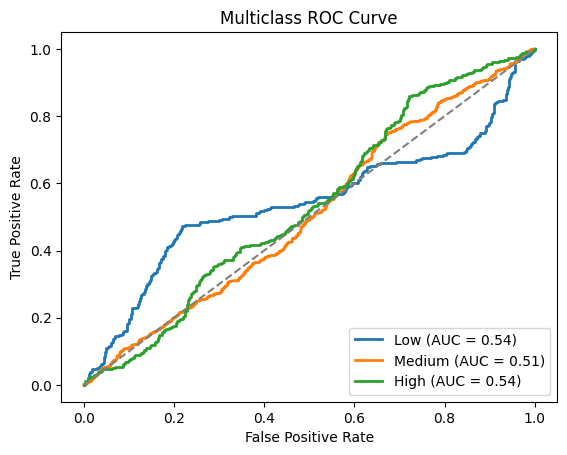

Logistic Regression - Accuracy: 0.6967
Logistic Regression - F1 Score: 0.5721
RMSE : 1.227833766263071
Precision: 0.4853
Recall: 0.6967
F-Measure: 0.5721


c:\users\sai sharan\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
# Preparing the 'Rating' column by categorizing numerical values into 'Low', 'Medium', 'High' categories. 
# Splitting the dataset into training and testing sets, and training a Logistic Regression model.
# Evaluating the model using metrics such as accuracy, F1 score, Cohen's Kappa, RMSE, precision, recall, and F-measure.
# Plotting the ROC curve for each class and calculating AUC values.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, roc_curve, auc, confusion_matrix, mean_squared_error, precision_score, recall_score

bins = [0, 2, 4, 5]  
labels = ['Low', 'Medium', 'High']  
dataset_2['Rating'] = pd.cut(dataset_2['Rating'], bins=bins, labels=labels)

X_data_2 = dataset_2.drop('Rating', axis=1)
y_data_2 = dataset_2['Rating']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_data_2, y_data_2, test_size=0.3, random_state=42)

log_reg_2 = LogisticRegression(max_iter=1000)
log_reg_2.fit(X_train_2, y_train_2)

y_pred_2 = log_reg_2.predict(X_test_2)

accuracy_2 = accuracy_score(y_test_2, y_pred_2)
f1_2 = f1_score(y_test_2, y_pred_2, average='weighted')  # Specify 'weighted' for multiclass
cohen_kappa_2 = cohen_kappa_score(y_test_2, y_pred_2)

y_test_bi = pd.get_dummies(y_test_2)  # Convert categories to binary for ROC
y_pred_pr = log_reg_2.predict_proba(X_test_2)

fpr_2 = {}
tpr_2 = {}
roc_auc_2 = {}

for i, label in enumerate(labels):
    fpr_2[label], tpr_2[label], _ = roc_curve(y_test_bi.iloc[:, i], y_pred_pr[:, i])
    roc_auc_2[label] = auc(fpr_2[label], tpr_2[label])

plt.figure()
for label in labels:
    plt.plot(fpr_2[label], tpr_2[label], lw=2, label=f'{label} (AUC = {roc_auc_2[label]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f"Logistic Regression - Accuracy: {accuracy_2:.4f}")
print(f"Logistic Regression - F1 Score: {f1_2:.4f}")

rmse_2 = np.sqrt(mean_squared_error(pd.factorize(y_test_2)[0], pd.factorize(y_pred_2)[0]))
print("RMSE :", rmse_2)

precision_2 = precision_score(y_test_2, y_pred_2, average='weighted')
recall_2 = recall_score(y_test_2, y_pred_2, average='weighted')
f_measure_2 = 2 * (precision_2 * recall_2) / (precision_2 + recall_2)

print(f"Precision: {precision_2:.4f}")
print(f"Recall: {recall_2:.4f}")
print(f"F-Measure: {f_measure_2:.4f}")

In [19]:
# Loading the IMDb Reviews dataset into a DataFrame.
# Using .shape to check the number of rows and columns in the dataset.

dataset_3 = pd.read_csv("IMDB Dataset.csv") 
dataset_3.shape

(50000, 2)

In [20]:
# Displaying the first 5 rows of the IMDb dataset to understand its structure and content.

print("First 5 rows of the IMDB Dataset:")
print(dataset_3.head())

First 5 rows of the IMDB Dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [21]:
# Displaying dataset information, including column types, non-null counts, and memory usage.

print("Dataset Info:")
dataset_3.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [22]:
# Checking for missing values in each column of the IMDb dataset.
# .isnull() identifies null values, and .sum() gives the total count per column.

print("Missing Values in the Dataset:")
print(dataset_3.isnull().sum())

Missing Values in the Dataset:
review       0
sentiment    0
dtype: int64


In [23]:
# Preprocessing text by removing stopwords and applying lemmatization to each word in the 'review' column.
# The 'new_review' column stores the cleaned version of the text for further analysis.

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

def preprocess_text(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]
    return " ".join(tokens)

dataset_3['new_review'] = dataset_3['review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to C:\Users\Sai
[nltk_data]     Sharan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sai
[nltk_data]     Sharan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.8909
F1 Score: 0.8932
Cohen's Kappa: 0.7818
Mean Squared Error: 0.1091
Precision: 0.8849
Recall: 0.9017
Confusion Matrix:
[[6521  890]
 [ 746 6843]]


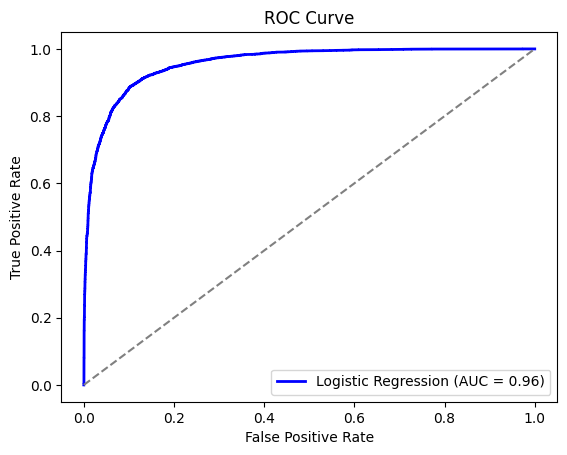

AUC: 0.9575


In [24]:
# Encoding the sentiment labels (positive/negative) into numeric values (1/0) using LabelEncoder.
# Splitting the dataset, performing TF-IDF vectorization on text data, and training a Logistic Regression model.
# Evaluating model performance using multiple metrics like Accuracy, F1 Score, Precision, Recall, and AUC.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, mean_squared_error, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset_3['sentiment'] = label_encoder.fit_transform(dataset_3['sentiment'])

X_data_3 = dataset_3['new_review']
y_data_3 = dataset_3['sentiment']

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X_data_3)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_tfidf, y_data_3, test_size=0.3, random_state=42)

log_reg_3 = LogisticRegression(max_iter=1000)
log_reg_3.fit(X_train_3, y_train_3)

y_pred_3 = log_reg_3.predict(X_test_3)

accuracy_3 = accuracy_score(y_test_3, y_pred_3)
print(f"Accuracy: {accuracy_3:.4f}")

f1_3 = f1_score(y_test_3, y_pred_3)
print(f"F1 Score: {f1_3:.4f}")

cohen_kappa_3 = cohen_kappa_score(y_test_3, y_pred_3)
print(f"Cohen's Kappa: {cohen_kappa_3:.4f}")

mse_3 = mean_squared_error(y_test_3, y_pred_3)
print(f"Mean Squared Error: {mse_3:.4f}")

precision_3 = precision_score(y_test_3, y_pred_3)
print(f"Precision: {precision_3:.4f}")

recall_3 = recall_score(y_test_3, y_pred_3)
print(f"Recall: {recall_3:.4f}")

cm_3 = confusion_matrix(y_test_3, y_pred_3)
print("Confusion Matrix:")
print(cm_3)

fpr_3, tpr_3, thresholds_3 = roc_curve(y_test_3, log_reg_3.predict_proba(X_test_3)[:, 1])
roc_auc_3 = auc(fpr_3, tpr_3)

plt.figure()
plt.plot(fpr_3, tpr_3, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_3:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc_3:.4f}")

Accuracy: 0.8537
F1 Score: 0.8558
Cohen's Kappa: 0.7073
Mean Squared Error: 0.1463
Precision: 0.8535
Recall: 0.8581
Confusion Matrix:
[[6293 1118]
 [1077 6512]]


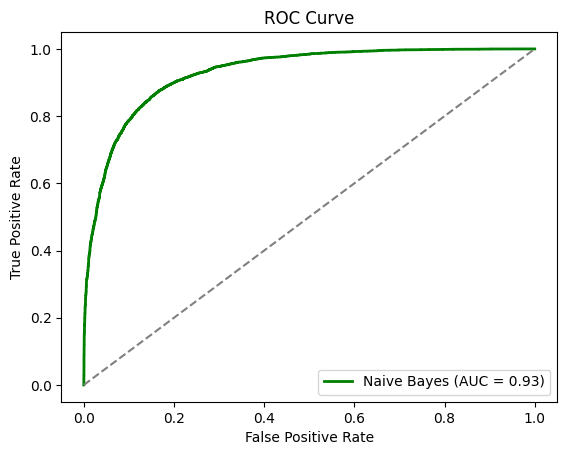

AUC: 0.9296


In [25]:
# Training a Naive Bayes classifier on the preprocessed text data using TF-IDF vectorization.
# Evaluating the model with various metrics such as Accuracy, F1 Score, Precision, Recall, and AUC.
# Potting the ROC curve and Calculating the AUC to visualize model performance.

from sklearn.naive_bayes import MultinomialNB

X_data_3_nb = dataset_3['new_review']  # Assuming the cleaned text is in 'new_review'
y_data_3_nb = dataset_3['sentiment']

vectorizer_nb = TfidfVectorizer(max_features=5000)
X_tfidf_nb = vectorizer.fit_transform(X_data_3_nb)

X_train_3_nb, X_test_3_nb, y_train_3_nb, y_test_3_nb = train_test_split(X_tfidf_nb, y_data_3_nb, test_size=0.3, random_state=42)

naive_bayes_3_nb = MultinomialNB()
naive_bayes_3_nb.fit(X_train_3_nb, y_train_3_nb)

y_pred_3_nb = naive_bayes_3_nb.predict(X_test_3_nb)

accuracy_3_nb = accuracy_score(y_test_3_nb, y_pred_3_nb)
print(f"Accuracy: {accuracy_3_nb:.4f}")

f1_3_nb = f1_score(y_test_3_nb, y_pred_3_nb)
print(f"F1 Score: {f1_3_nb:.4f}")

cohen_kappa_3_nb = cohen_kappa_score(y_test_3_nb, y_pred_3_nb)
print(f"Cohen's Kappa: {cohen_kappa_3_nb:.4f}")

mse_3_nb = mean_squared_error(y_test_3_nb, y_pred_3_nb)
print(f"Mean Squared Error: {mse_3_nb:.4f}")

precision_3_nb = precision_score(y_test_3_nb, y_pred_3_nb)
print(f"Precision: {precision_3_nb:.4f}")

recall_3_nb = recall_score(y_test_3_nb, y_pred_3_nb)
print(f"Recall: {recall_3_nb:.4f}")

cm_3_nb = confusion_matrix(y_test_3_nb, y_pred_3_nb)
print("Confusion Matrix:")
print(cm_3_nb)

fpr_3_nb, tpr_3_nb, thresholds_3_nb = roc_curve(y_test_3_nb, naive_bayes_3_nb.predict_proba(X_test_3_nb)[:, 1])
roc_auc_3_nb = auc(fpr_3_nb, tpr_3_nb)

plt.figure()
plt.plot(fpr_3_nb, tpr_3_nb, color='green', lw=2, label=f'Naive Bayes (AUC = {roc_auc_3_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc_3_nb:.4f}")

Accuracy: 0.8587
F1 Score: 0.8629
Cohen's Kappa: 0.7172
Mean Squared Error: 0.1413
Precision: 0.8474
Recall: 0.8789
Confusion Matrix:
[[6210 1201]
 [ 919 6670]]


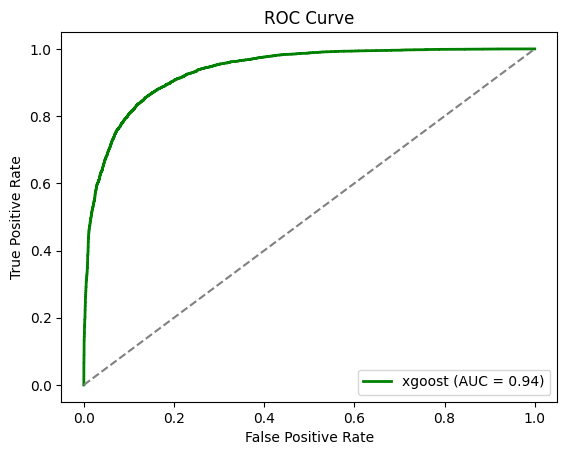

AUC: 0.9366


In [26]:
# Train an XGBoost classifier on the preprocessed text data using TF-IDF vectorization.
# Evaluate the model using various performance metrics including Accuracy, F1 Score, Precision, Recall, and AUC.
# Plot the ROC curve and calculate the AUC to visualize the model's performance.

import xgboost as xg

X_data_3_xg = dataset_3['new_review']
y_data_3_xg = dataset_3['sentiment']

vectorizer_xg = TfidfVectorizer(max_features=5000)
X_tfidf_xg = vectorizer.fit_transform(X_data_3_xg)

X_train_3_xg, X_test_3_xg, y_train_3_xg, y_test_3_xg = train_test_split(X_tfidf_xg, y_data_3_xg, test_size=0.3, random_state=42)

xg_model = xg.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xg_model.fit(X_train_3_xg, y_train_3_xg)

y_pred_3_xg = xg_model.predict(X_test_3_xg)

accuracy_3_xg = accuracy_score(y_test_3_xg, y_pred_3_xg)
print(f"Accuracy: {accuracy_3_xg:.4f}")

f1_3_xg = f1_score(y_test_3_xg, y_pred_3_xg)
print(f"F1 Score: {f1_3_xg:.4f}")

cohen_kappa_3_xg = cohen_kappa_score(y_test_3_xg, y_pred_3_xg)
print(f"Cohen's Kappa: {cohen_kappa_3_xg:.4f}")

mse_3_xg = mean_squared_error(y_test_3_xg, y_pred_3_xg)
print(f"Mean Squared Error: {mse_3_xg:.4f}")

precision_3_xg = precision_score(y_test_3_xg, y_pred_3_xg)
print(f"Precision: {precision_3_xg:.4f}")

recall_3_xg = recall_score(y_test_3_xg, y_pred_3_xg)
print(f"Recall: {recall_3_xg:.4f}")

cm_3_xg = confusion_matrix(y_test_3_xg, y_pred_3_xg)
print("Confusion Matrix:")
print(cm_3_xg)

fpr_3_xg, tpr_3_xg, thresholds_3_xg = roc_curve(y_test_3_xg, xg_model.predict_proba(X_test_3_xg)[:, 1])
roc_auc_3_xg = auc(fpr_3_xg, tpr_3_xg)

plt.figure()
plt.plot(fpr_3_xg, tpr_3_xg, color='green', lw=2, label=f'xgoost (AUC = {roc_auc_3_xg:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc_3_xg:.4f}")